In [1]:
import os
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import uproot

from mu2etools import *
from mu2etools import wideband

hep.style.use('ATLAS')  # or ATLAS/LHCb2


In [2]:
DATASET = 'rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-006-000.root'
runlist = [1312, 1315, 1341] #1312@22C, 1315@22C, 1317@15C
processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist, userunlist=True, remove=False)
ar = processor.getData(DATASET)

In [3]:
ar_hi = ar[(ar['runNumber']==1312) | (ar['runNumber']==1315)]
ar_lo = ar[ar['runNumber']==1341]

In [4]:
def plotCompare(var='PEs', ylim=(10,60), ylabel='PEs'):
    ar_hiPE = ak.mean(ar_hi[var], axis=0).to_numpy().compressed()[0:128]
    ar_loPE = ak.mean(ar_lo[var], axis=0).to_numpy().compressed()[0:128]

    plt.figure(figsize=(10,6))
    plt.plot(ar_hiPE, '.-', label='Data at 22C', linewidth=1)
    plt.plot(ar_loPE, '.-', label='Data at 15C', linewidth=1)
    plt.xlabel('Channel ID')
    plt.ylabel(ylabel)
    plt.legend()
    plt.ylim(ylim);
    plt.xlim(-1);
    
    plt.figure(figsize=(10,6))
    pull = (ar_hiPE-ar_loPE)/ar_hiPE*100
    plt.hist(pull, histtype='step', bins=20, label='Residual: %.1f +/- %.1f'%(pull.mean(), pull.std()) );
    plt.xlabel('Difference [%]')
    plt.ylabel('Events')
    plt.legend();

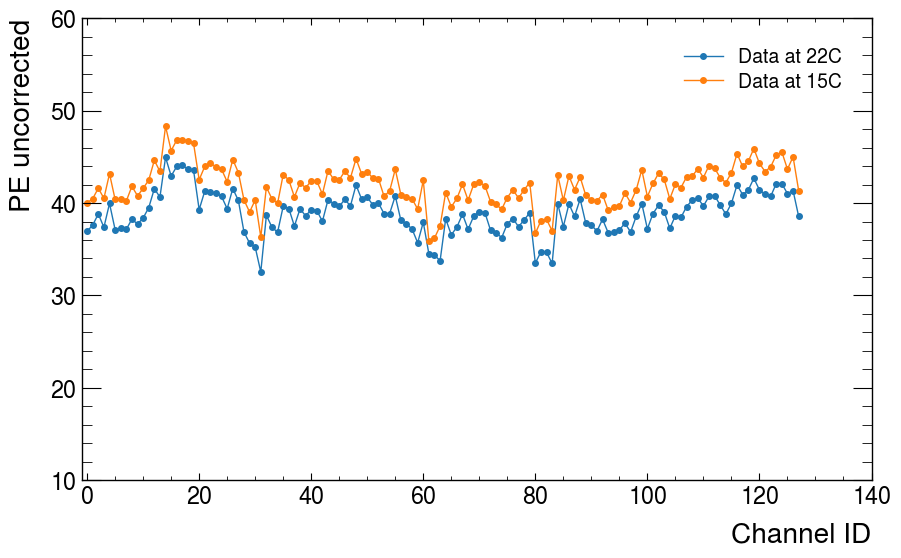

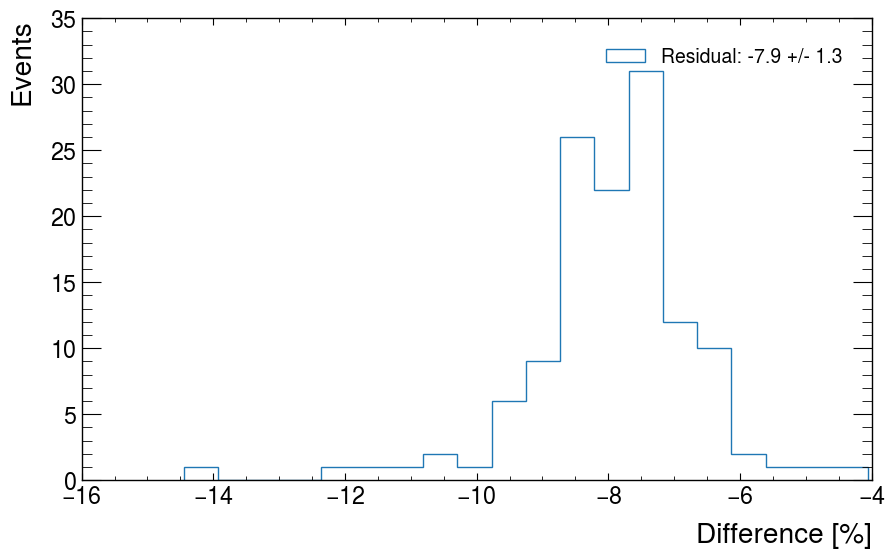

In [5]:
plotCompare(ylabel='PE uncorrected')

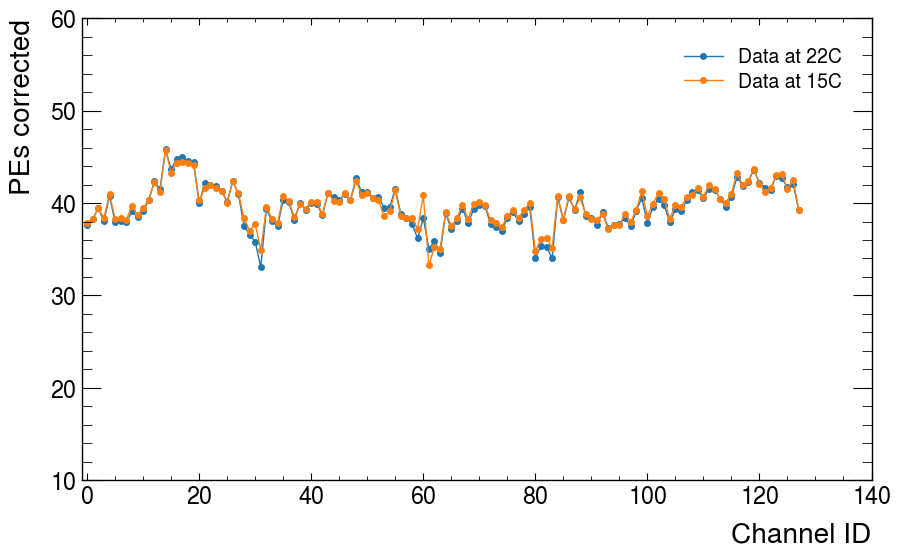

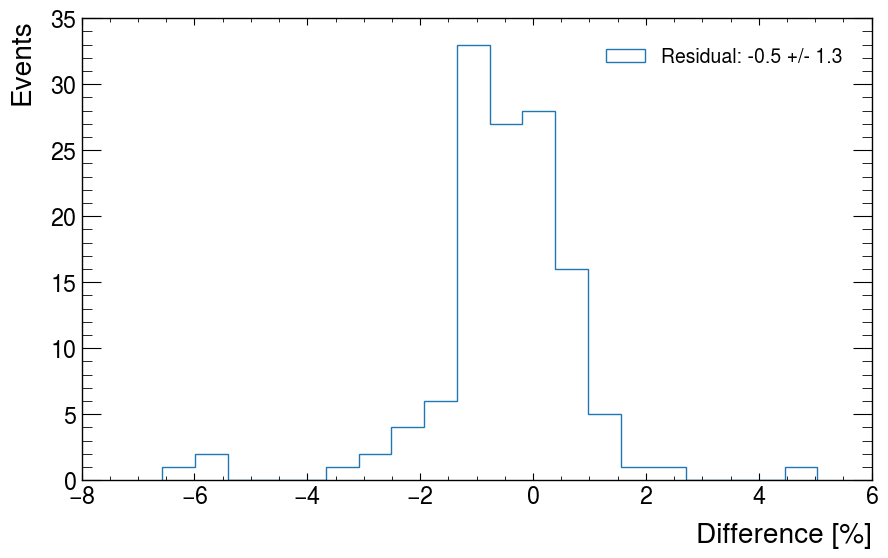

In [6]:
plotCompare('PEsTemperatureCorrected', ylabel='PEs corrected')

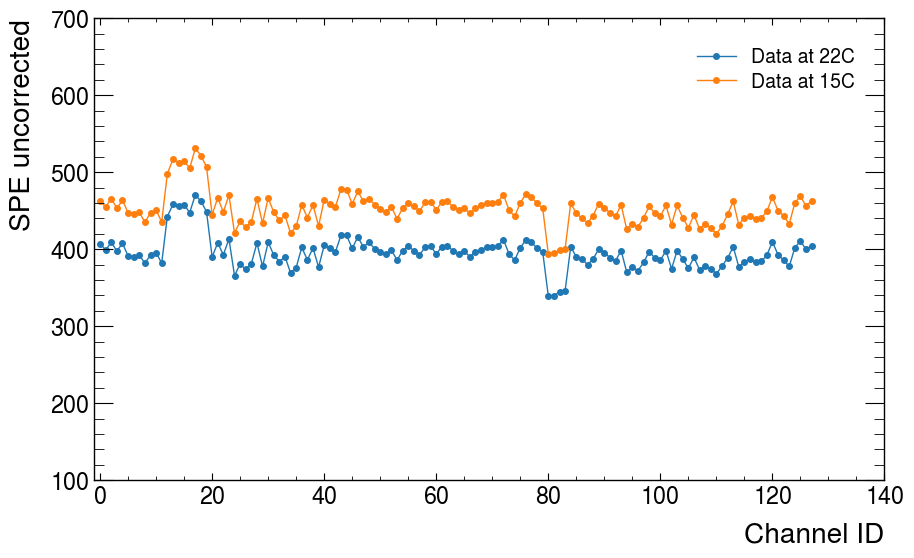

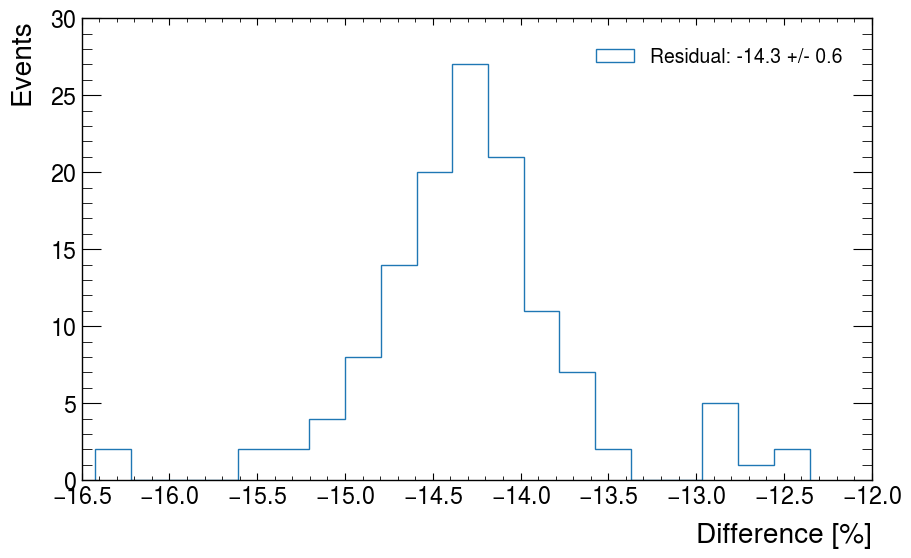

In [7]:
plotCompare('calibConstants', ylim=(100,700), ylabel='SPE uncorrected')

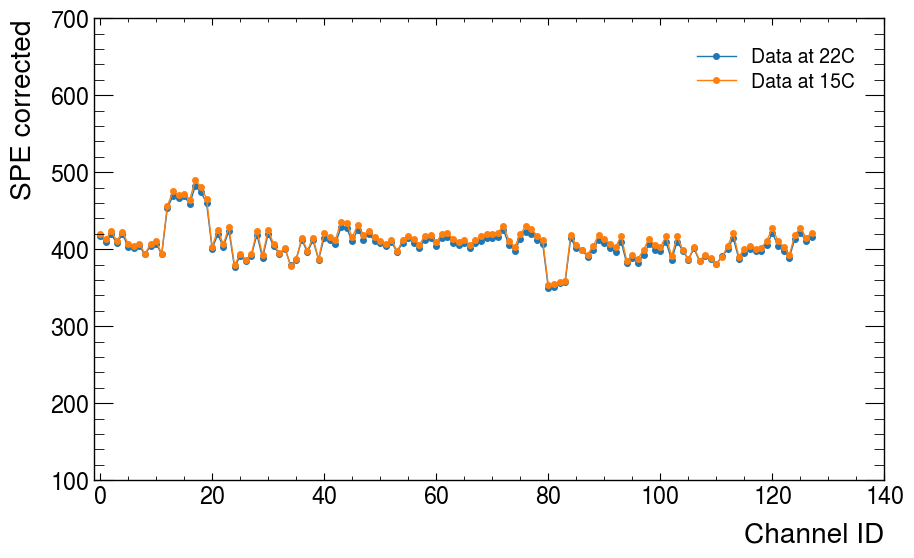

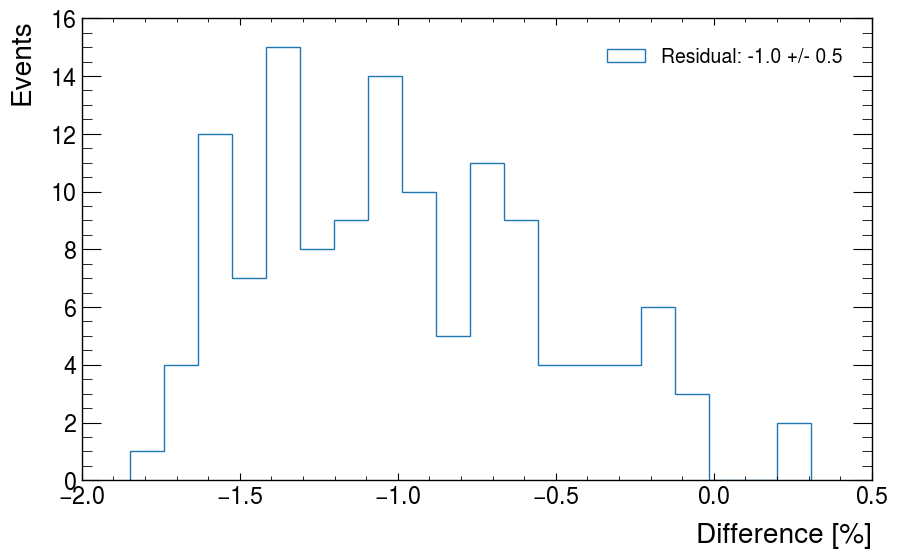

In [8]:
plotCompare('calibConstantsTemperatureCorrected', ylim=(100,700), ylabel='SPE corrected')